<font size=6><b>Lec09.NLP 텍스트 전처리(Text preprocessing)

<pre>
01) 토큰화(Tokenization)

02) 정제(Cleaning) and 정규화(Normalization)
03) 어간 추출(Stemming) and 표제어 추출(Lemmatization)
04) 불용어(Stopword)
05) 정규 표현식(Regular Expression)

06) 정수 인코딩(Integer Encoding)
08) 원-핫 인코딩(One-Hot Encoding)
07) 패딩(Padding)

* 딥 러닝을 이용한 자연어 처리 입문
* https://wikidocs.net/book/2155

* 자연어 처리(Natural Language Processing:NLP)
    * 자연어의 의미를 분석하여 컴퓨터가 처리할 수 있도록 하는 일

In [1]:
# ! pip install nltk
# ! pip install jpype    #---비추 (whl 다운받아 설치, JAVA_HOME\bin 환경변수)
# # -------------------- kkoma tweepy   (4)
# ! pip install konlpy   #---비추 (whl 다운받아 설치, tweepy==3.1x)
# # -------------------- 별도 한글 사전, 형태소 분석기 설치
# ! pip install mecab    #---비추 (whl 다운받아 설치, c:\mecab 압축풀기:x86,dic)

# # -------------------- 기타(띄어쓰기, PyKoSpacing:다운그래이드문제로 설치 XXX)
# ! pip install kss
# # -------------------- 기타(신조어)
# ! pip install soynlp


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

# 토큰화(Tokenization)
* 코퍼스(corpus)에서 토큰(token)이라 불리는 단위로 나누는 작업
* 단어 토큰화 : 일반적으로 whitespace(띄어쓰기)로 나눔
* 문장 토큰화 : 일반적으로 구두점(.)로 나눔


## nltk

### 단어 토큰화

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASIA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<pre>
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\677\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.

In [4]:
from nltk.tokenize import word_tokenize
# from nltk.tokenize import WordPunctTokenizer
# from nltk.tokenize import TreebankWordTokenizer

sent = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."

print('원본 :',sent)
print('단어 토큰화1 :',word_tokenize(sent))

원본 : Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop.
단어 토큰화1 : ['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


### 문장 토큰화

In [5]:
from nltk.tokenize import sent_tokenize

sent = """His barber kept his word. 
          But keeping such a huge secret to himself was driving him crazy. 
          Finally, the barber went up a mountain and almost to the edge of a cliff. 
          He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."""

print('문장 토큰화 list :',sent_tokenize(sent))

문장 토큰화 list : ['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to make sure no one was near.']


In [6]:
# 줄바꿈하면 문장 분리가 안된다.
# import kss

# sent = """딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다! 이제 해보면 알걸요?"""
# print('한국어 문장 토큰화 :',kss.split_sentences(sent))

In [7]:
sent = "IP 192.168.56.31 서버에 들어가서 로그 파일 저장해서 aaa@gmail.com로 결과 좀. 보내줘. 그 후 점심 먹으러 가자."
print(' 문장 토큰화 list :',sent_tokenize(sent))

 문장 토큰화 list : ['IP 192.168.56.31 서버에 들어가서 로그 파일 저장해서 aaa@gmail.com로 결과 좀.', '보내줘.', '그 후 점심 먹으러 가자.']


### 품사 태깅

In [8]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASIA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

<pre>
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\677\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.

In [9]:
from nltk.tag import pos_tag

sent = "I am actively looking for Ph.D. students. and you are a Ph.D. student."
word_list = word_tokenize(sent)

print('단어 토큰화 :', word_list)
print('품사 태깅 :'  , pos_tag(word_list))

단어 토큰화 : ['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student', '.']
품사 태깅 : [('I', 'PRP'), ('am', 'VBP'), ('actively', 'RB'), ('looking', 'VBG'), ('for', 'IN'), ('Ph.D.', 'NNP'), ('students', 'NNS'), ('.', '.'), ('and', 'CC'), ('you', 'PRP'), ('are', 'VBP'), ('a', 'DT'), ('Ph.D.', 'NNP'), ('student', 'NN'), ('.', '.')]


## KoNLPy(코엔엘파이)

* 한국어 자연어 처리를 위한 파이썬 패키지
* 형태소 분석기 :  Okt(Open Korea Text), 코모란(Komoran), 한나눔(Hannanum), 꼬꼬마(Kkma)
* 메캅(Mecab) 별도 설치
    * 1) morphs : 형태소 추출
    * 2) pos : 품사 태깅(Part-of-speech tagging)
    * 3) nouns : 명사 추출


In [10]:
from konlpy.tag import Komoran
# from konlpy.tag import Okt
# from konlpy.tag import Kkma

komoran = Komoran()
# okt = Okt()
# kkma = Kkma()

print('Komoran 형태소 분석 :', komoran.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

print('Komoran 품사 태깅 :'  , komoran.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('Komoran 명사 추출 :'  , komoran.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 

Komoran 형태소 분석 : ['열심히', '코', '딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가', '아', '보', '아요']
Komoran 품사 태깅 : [('열심히', 'MAG'), ('코', 'NNG'), ('딩', 'MAG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('당신', 'NNP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가', 'VV'), ('아', 'EC'), ('보', 'VX'), ('아요', 'EC')]
Komoran 명사 추출 : ['코', '당신', '연휴', '여행']


In [11]:
from nltk.tokenize import word_tokenize
sent = "열심히 코딩한 당신, 연휴에는 여행을 가봐요"
print('원본 :',sent)
print('단어 토큰화1 :',word_tokenize(sent))

원본 : 열심히 코딩한 당신, 연휴에는 여행을 가봐요
단어 토큰화1 : ['열심히', '코딩한', '당신', ',', '연휴에는', '여행을', '가봐요']


## Mecab : 한글 강추
* 사용법은 KoNLPy(코엔엘파이)와 같다

In [12]:
# --------------------------------
# Mecab 사전
# --------------------------------
from konlpy.tag import Mecab
mecab = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")

print('Mecab 형태소 분석 :', mecab.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

print('Mecab 품사 태깅 :'  , mecab.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('Mecab 명사 추출 :'  , mecab.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 


Mecab 형태소 분석 : ['열심히', '코딩', '한', '당신', ',', '연휴', '에', '는', '여행', '을', '가', '봐요']
Mecab 품사 태깅 : [('열심히', 'MAG'), ('코딩', 'NNG'), ('한', 'XSA+ETM'), ('당신', 'NP'), (',', 'SC'), ('연휴', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가', 'VV'), ('봐요', 'EC+VX+EC')]
Mecab 명사 추출 : ['코딩', '당신', '연휴', '여행']


* 띄어쓰기에 민감하지 않다

In [13]:
print( mecab.morphs("아버지가방에들어가신다") )
print(  mecab.pos("아버지가방에들어가신다") )

['아버지', '가', '방', '에', '들어가', '신다']
[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('신다', 'EP+EC')]


## Keras

### 단어 토큰화

In [14]:
from keras.preprocessing.text import text_to_word_sequence

In [15]:
print(' keras :',text_to_word_sequence("I am a boy. You are a girl."))
print(' keras :',text_to_word_sequence("나는 밥을 먹는다. 어제도 밥을 먹었다."))

 keras : ['i', 'am', 'a', 'boy', 'you', 'are', 'a', 'girl']
 keras : ['나는', '밥을', '먹는다', '어제도', '밥을', '먹었다']


### 복합 토큰화

In [16]:
from keras.preprocessing.text import Tokenizer
text_list = ['홍길동은 딥러닝을 공부합니다.',
        '홍길동은 딥러닝이 어렵습니다.', 
        '아무개도 딥러닝을 시작합니다.']

token = Tokenizer()
token.fit_on_texts(text_list)
print(' keras : \n')
print('문장 카운트 : ',token.document_count) 

print("==="*20)
print("문장 토큰화(texts_to_sequences) : ")
text_seq_list = token.texts_to_sequences(text_list)
print(text_seq_list)

print("==="*20)
for seq, sent in zip (text_seq_list,text_list) :
    print(sent, seq)

print("==="*20)      
print('단어 카운트 : \n', token.word_counts) 

print("==="*20)
print('각 단어에 매겨진 인덱스 값 :  \n',token.word_index)

print("==="*20)
print('각 단어가 몇 개의 문장에 포함되어 있는가 :  \n',token.word_docs) 


 keras : 

문장 카운트 :  3
문장 토큰화(texts_to_sequences) : 
[[1, 2, 3], [1, 4, 5], [6, 2, 7]]
홍길동은 딥러닝을 공부합니다. [1, 2, 3]
홍길동은 딥러닝이 어렵습니다. [1, 4, 5]
아무개도 딥러닝을 시작합니다. [6, 2, 7]
단어 카운트 : 
 OrderedDict([('홍길동은', 2), ('딥러닝을', 2), ('공부합니다', 1), ('딥러닝이', 1), ('어렵습니다', 1), ('아무개도', 1), ('시작합니다', 1)])
각 단어에 매겨진 인덱스 값 :  
 {'홍길동은': 1, '딥러닝을': 2, '공부합니다': 3, '딥러닝이': 4, '어렵습니다': 5, '아무개도': 6, '시작합니다': 7}
각 단어가 몇 개의 문장에 포함되어 있는가 :  
 defaultdict(<class 'int'>, {'홍길동은': 2, '공부합니다': 1, '딥러닝을': 2, '딥러닝이': 1, '어렵습니다': 1, '아무개도': 1, '시작합니다': 1})


# 전처리

## 정제(Cleaning), 정규화(Normalization)

* 정제(cleaning) : 갖고 있는 코퍼스로부터 노이즈 데이터를 제거한다.
    * 불용어
* 정규화(normalization) : 표현 방법이 다른 단어들을 통합시켜서 같은 단어로 만들어준다.
    * 어간(Stemming),표제어(Lemmatization) 추출
    * 정규성 : 단어수 == 피쳐수 (복잡성을 줄이는 일)
    * BoW(Bag of Words) : 단어의 빈도수를 기반 문서 내의 단어 수를 줄인다

## 어간(Stemming),표제어(Lemmatization) 추출

<pre>
* 표제어(Lemma) : '표제어' 또는 '기본 사전형 단어' 
* 어간(Stem)    : 어간(stem)과 접사(affix) 중 어간 추출
                : 단어의 의미를 담고 있는 단어의 핵심 부분
                
Lemmatization
    am → be
    the going → the going
    having → have

Stemming
    am → am
    the going → the go
    having → hav

### nltk

#### 표제어(Lemmatization) 추출

In [17]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASIA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<pre>
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\677\AppData\Roaming\nltk_data...

In [18]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASIA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

<pre>
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\677\AppData\Roaming\nltk_data...

In [19]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

#------------ 'lives' -->  'life'  -------
print('표제어 추출 전 :',words)
print('표제어 추출 후 :',[lemmatizer.lemmatize(word) for word in words])

표제어 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
표제어 추출 후 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


In [20]:
lemmatizer.lemmatize('has', 'v')

'have'

#### 어간(Stemming)

In [21]:
from nltk.stem import PorterStemmer
# from nltk.stem import LancasterStemmer

stemmer = PorterStemmer()
sent = "This was formalize allowance electricical."
word_list = word_tokenize(sent)

print('어간 추출 전 :', word_list)
print('어간 추출 후 :',[stemmer.stem(word) for word in word_list])

어간 추출 전 : ['This', 'was', 'formalize', 'allowance', 'electricical', '.']
어간 추출 후 : ['thi', 'wa', 'formal', 'allow', 'electric', '.']


In [22]:
from nltk.stem import PorterStemmer
# from nltk.stem import LancasterStemmer

stemmer = PorterStemmer()
sent = "나는 빨간 사과가 좋아지려고 합니다."
word_list = word_tokenize(sent)

print('어간 추출 전 :', word_list)
print('어간 추출 후 :',[stemmer.stem(word) for word in word_list])

어간 추출 전 : ['나는', '빨간', '사과가', '좋아지려고', '합니다', '.']
어간 추출 후 : ['나는', '빨간', '사과가', '좋아지려고', '합니다', '.']


### Konlpy
<pre>
* 용언(동사, 형용사)에 주로 활용
* 잡/어간 + 다/어미

* 어간(stem) 
    원칙적으로 모양이 변하지 않는 부분
    때론 어간의 모양도 바뀔 수 있음(예: 긋다, 긋고, 그어서, 그어라).
* 어미(ending)
    어간 뒤에 붙어서 활용하면서 변하는 부분
    여러 문법적 기능을 수행

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbOJTmc%2FbtqG6ISvJXo%2FJvALaKpR9g1qNuHWlhOp0K%2Fimg.png">

https://velog.io/@metterian/%ED%95%9C%EA%B5%AD%EC%96%B4-%ED%98%95%ED%83%9C%EC%86%8C-%EB%B6%84%EC%84%9D%EA%B8%B0POS-%EB%B6%84%EC%84%9D-3%ED%8E%B8.-%ED%98%95%ED%83%9C%EC%86%8C-%EB%B6%84%EC%84%9D%EA%B8%B0-%EB%B9%84%EA%B5%90

In [23]:
##### stem: 각 단어에서 어간 추출 #####
from konlpy.tag import Okt
okt = Okt()
sent = "열심히 코딩한 당신, 연휴에는 여행을 가봐요"
print(okt.morphs(sent, stem = True))
print(okt.morphs(sent, norm = True))

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가보다']
['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']


In [24]:
# #빈도수 정렬
# vocab_sorted = sorted(vocab.items(), key = lambda x:x[1], reverse = True)
# print(vocab_sorted)
# 출처: https://mr-doosun.tistory.com/25?category=731142 

## 불용어(Stopword)
* 자주 등장하지만 분석을 하는 것에 있어서는 큰 도움이 되지 않는 단어들  
    ref : https://github.com/stopwords-iso/stopwords-ko  
    ./ko_stopwords.txt  
* 1차 : 불용어사전(csv, txt)을 이용
* 2차 : 최빈도(적다,많다) 제거
* 3차 : 정규화(import re)를 통해 제거

### nltk

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASIA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<pre>
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\677\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.

In [26]:
from nltk.corpus import stopwords
stop_words_list = stopwords.words('english')
print('불용어 개수 :', len(stop_words_list))
print('불용어 10개 출력 :',stop_words_list[:10])

불용어 개수 : 179
불용어 10개 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


* 원리이해용

In [27]:
stop_words_list = []
stop_words_list.append("important")

sent = "Apple is not an important thing. It's everything."
word_list = word_tokenize(sent)

result = []
for word in word_list: 
    if word not in stop_words_list: #씨잘데기없는게 아니면
        result.append(word) 

print('불용어 제거 전 :', sent) 
print('불용어 제거 후 :', result)

# --------------------------------------
# 불용어 제거 전 : Apple is not an important thing. It's everything.
# 불용어 제거 후 : ['Apple', 'thing', '.', 'It', "'s", 'everything', '.']


불용어 제거 전 : Apple is not an important thing. It's everything.
불용어 제거 후 : ['Apple', 'is', 'not', 'an', 'thing', '.', 'It', "'s", 'everything', '.']


### Mecap

In [28]:
sent = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든다."
stop_word_list = ["고기", "하면","안","돼","다"]

# -----------------------------------------------
# from konlpy.tag import Komoran
# komoran = Komoran()
# word_list = komoran.morphs(sent)  #형태소분석
# -----------------------------------------------

from konlpy.tag import Mecab
mecab = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")
word_list = mecab.morphs(sent)  #형태소분석

result = [word for word in word_list if not word in stop_word_list]
# result = []
# for word in word_list: 
#     if word not in stop_words_list: #씨잘데기없는게 아니면
#         result.append(word) 

print('불용어 제거 전 :' ,sent) 
print('불용어 제거 후 :' ,result)

불용어 제거 전 : 고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든다.
불용어 제거 후 : ['를', '아무렇', '게', '나', '구우', '려고', '하', '면', '.', '라고', '같', '은', '게', '아니', '거든', '.']


## 패딩
* 병렬 연산을 위해서 여러 문장의 길이를 임의로 동일하게 맞춰주는 작업

<pre>
tf.keras.preprocessing.sequence.pad_sequences(
    sequences, maxlen=None, dtype="int32", padding="pre", truncating="pre", value=0.0
)

<b>tf.keras.utils.pad_sequences
* tokenizer.fit_on_texts(L) 
* enc=tokenizer.texts_to_sequences(L) 
* pad_sequences(enc)

In [77]:
from tensorflow.keras.utils import pad_sequences

In [81]:
corpus = [['This is a black cat'],
          [ 'This is a white dog at home'] ]
#2D

In [126]:
corpus = np.array(corpus).reshape(-1)
#1D

In [132]:
max_length = max(len(x.split()) for x in corpus )
print('최대길이(Voca Size):', max_length)

최대길이(Voca Size): 7


In [133]:
token = Tokenizer()
token.fit_on_texts(corpus)
enc=token.texts_to_sequences(corpus) 
enc = pad_sequences(enc, maxlen=max_length,padding="post")
enc

array([[1, 2, 3, 4, 5, 0, 0],
       [1, 2, 3, 6, 7, 8, 9]])

In [92]:
token.word_counts

OrderedDict([('this is a black cat', 1), ('this is a white dog at home', 1)])

# 인코딩
* 라벨인코딩
    * 정수인코딩
    * Voca : 단어인덱스 + 빈도
* 원핫인코딩

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# from keras.utils import to_categorical
# from pandas as pd
# pd.get_dummies()

In [134]:
from keras.utils import to_categorical

In [136]:
to_categorical(np.array([1, 2, 3, 4, 5]))

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

# 빈도 

In [29]:
from collections import Counter
vocab = Counter(['쌀','밥','국','쌀'])
vocab

Counter({'쌀': 2, '밥': 1, '국': 1})

In [30]:
from keras.preprocessing.text import Tokenizer

sent_list = ['나는 밥을 먹었다.','나는 밥을 태웠다.']
token = Tokenizer()
token.fit_on_texts(sent_list)
# print(token.document_count)
# print(token.word_index)        #정수인코딩
# print(token.texts_to_sequences(sent_list))
print(token.word_counts)
print(token.word_docs)

OrderedDict([('나는', 2), ('밥을', 2), ('먹었다', 1), ('태웠다', 1)])
defaultdict(<class 'int'>, {'먹었다': 1, '나는': 2, '밥을': 2, '태웠다': 1})


## DataFrame to list
* ['쌀','밥','국','쌀']
* ('쌀', 2), ('밥', 2), ('갈비', 1)
* {'쌀': 2, '밥': 1, '갈비': 2}

### 1D 
* ['쌀','밥','국','쌀']
* vocab = Counter(tot_list)

In [56]:
df = pd.read_csv("./datasets/sicksu_train.csv")[:50]

In [57]:
print(df['중식메뉴'].values.shape)
tot_list = []
for row in df['중식메뉴'].values[:2]:
    word_list = row.split( )
    # 정규표현식... word_list
    
    tot_list.extend(word_list)
print(tot_list   )

from collections import Counter
vocab = Counter(tot_list)   #['쌀','밥','국','쌀']
vocab

(50,)
['쌀밥/잡곡밥', '(쌀,현미흑미:국내산)', '오징어찌개', '쇠불고기', '(쇠고기:호주산)', '계란찜', '청포묵무침', '요구르트', '포기김치', '(배추,고추가루:국내산)', '쌀밥/잡곡밥', '(쌀,현미흑미:국내산)', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이', '(배추,고추가루:국내산)']


Counter({'쌀밥/잡곡밥': 2,
         '(쌀,현미흑미:국내산)': 2,
         '오징어찌개': 1,
         '쇠불고기': 1,
         '(쇠고기:호주산)': 1,
         '계란찜': 1,
         '청포묵무침': 1,
         '요구르트': 2,
         '포기김치': 1,
         '(배추,고추가루:국내산)': 2,
         '김치찌개': 1,
         '가자미튀김': 1,
         '모둠소세지구이': 1,
         '마늘쫑무침': 1,
         '배추겉절이': 1})

## 2D
* Tokenizer().fit_on_texts().word_counts
* ('쌀', 2), ('밥', 2), ('갈비', 1)
* {'쌀': 2, '밥': 1, '갈비': 2}

In [58]:
print(  np.array([1,2,3]).tolist()  )

[1, 2, 3]


In [59]:
sent_list = df['중식메뉴'].values.tolist()[:2]   #['나는 밥을 먹었다.','나는 밥을 태웠다.']
token = Tokenizer()
token.fit_on_texts(sent_list)
print(token.word_counts)
#print(token.word_docs)

OrderedDict([('쌀밥', 2), ('잡곡밥', 2), ('쌀', 2), ('현미흑미', 2), ('국내산', 4), ('오징어찌개', 1), ('쇠불고기', 1), ('쇠고기', 1), ('호주산', 1), ('계란찜', 1), ('청포묵무침', 1), ('요구르트', 2), ('포기김치', 1), ('배추', 2), ('고추가루', 2), ('김치찌개', 1), ('가자미튀김', 1), ('모둠소세지구이', 1), ('마늘쫑무침', 1), ('배추겉절이', 1)])


# [실습] Word Count

In [60]:
# ! pip install wordcloud
from wordcloud import WordCloud

In [61]:
df = pd.read_csv("./datasets/sicksu_train.csv")[['조식메뉴','중식메뉴','석식메뉴']][:50]
print(df.shape)
df.tail(10)

(50, 3)


,조식메뉴,중식메뉴,석식메뉴
40,모닝롤/야채샌드 우유/주스 계란후라이 녹두죽/쌀밥 (쌀:국내산) 민물새우찌개 구이김 포기김치 (김치:국내산),쌀밥/잡곡밥 (쌀:국내산) 버섯들깨탕 갈치조림 우엉잡채 아삭고추무침 포기김치 (김치:국내산),쌀밥/잡곡밥 (쌀:국내산) 쇠고기미역국 순살깐풍기 계란찜 숙주미나리나물 포기김치 (김치:국내산)
41,"모닝롤/팬케익 우유/두유/주스 계란후라이 잣죽/쌀밥 (쌀:국내산) 근대국 마늘쫑무침 포기김치 (배추,고추가루:국내산)","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 순두부찌개 쇠불고기 브로컬리맛살볶음 풋마늘초무침 포기김치 (배추,고추가루:국내산)","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 된장찌개 고등어조림 고기전 부추생채 포기김치 (김치:국내산)"
42,"모닝롤/단호박샌드 우유/두유/주스 계란후라이 양송이죽/쌀밥 (쌀:국내산) 두부젓국찌개 미역줄기볶음 포기김치 (배추,고추가루:국내산)","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 북어국 오징어볶음*소면 모둠소시지구이 시금치나물 포기김치 (배추,고추가루:국내산)","김치볶음밥 (쌀,현미흑미:국내산) 가쯔오장국 감자치즈구이 꽃맛살샐러드 단무지 깍두기 (배추,고추가루:국내산)"
43,"모닝롤/치즈프레즐 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 꽃게탕 방풍나물 포기김치 (배추,고추가루:국내산)","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 올갱이아욱국 제육볶음 두부조림 모둠쌈*쌈장 포기김치 (배추,고추가루:국내산)","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 매운버섯국 찜닭 탕평채 청경채생채 포기김치 (배추,고추가루:국내산)"
44,"모닝롤/치킨샌드 우유/두유/주스 계란후라이 흑임자죽/쌀밥 (쌀:국내산) 열무된장국 진미채무침 포기김치 (배추,고추가루:국내산)","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 어묵국 매운돼지갈비찜 해물파전 무생채 포기김치 (배추,고추가루:국내산)","김밥 (쌀,현미흑미:국내산) 우동 야채튀김 조각사과 오복지 포기김치 (배추,고추가루:국내산)"
45,"모닝롤/브라우니 우유/두유/주스 계란후라이 고구마죽/쌀밥 (쌀:국내산) 대구찌개 콩조림 포기김치 (배추,고추가루:국내산)","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 배추된장국 순살양념치킨 메추리알조림 콩나물무침 포기김치 (배추,고추가루:국내산)","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어국 미니함박 멸치호두볶음 치커리사과무침 포기김치 (배추,고추가루:국내산)"
46,"모닝롤/마늘빵 우유/두유/주스 계란후라이 견과류죽/쌀밥 (쌀:국내산) 고추장찌개 김자반 포기김치 (배추,고추가루:국내산)","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 시래기국 훈제오리구이 (훈제오리:국내산) 무쌈/양파절임 풋마늘초무침 포기김치 (배추,고추가루:국내산)",쌀밥/잡곡밥 (쌀:국내산) 쇠고기무국 (쇠고기:호주산) 가자미찜 계란야채말이 돌나물오이무침 포기김치 (김치:국내산)
47,"모닝롤/씨크립샌드 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쇠고기:호주산,쌀:국내산) 얼갈이된장국 감자채볶음 포기김치 (배추,고추가루:국내산)","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 부대찌개 쇠고기단호박조림 (쇠고기:호주산) 열무나물 시금치나물 포기김치 (배추,고추가루:국내산)","치킨마요덮밥 (닭,쌀:국내산) 유부주머니국 떡볶이 단무지무침 오렌지 포기김치 (김치:국내산)"
48,"모닝롤/에그샌드 우유/두유/주스 계란후라이 브로컬리죽/쌀밥 (쌀:국내산) 황태국 콩나물무침 포기김치 (배추,고추가루:국내산)","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 수제비국 돈육굴소스볶음 (돼지고기:국내산) 양배추쌈 무생채 포기김치 (배추,고추가루:국내산)",비빔밥 (쌀:국내산) 팽이버섯장국 새우또띠아 견과류조림 피크닉 포기김치 (김치:국내산)
49,"모닝롤/크로와상 우유/두유/주스 계란후라이 새우살죽/쌀밥 (쌀:국내산) 재첩국 시금치나물 포기김치 (배추,고추가루:국내산)","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 냉이된장찌개 닭데리야끼조림 (닭고기:국내산) 도라지초무침 콩나물무침 포기김치 (배추,고추가루:국내산)",쌀밥/잡곡밥 (쌀:국내산) 들깨미역국 수제돈가스 감자범벅 참나물생채 포기김치/무피클 (김치:국내산)


## 공통함수

In [62]:
def my_cloud_chart(prm):
    wc = WordCloud(font_path='C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF'
                   ,background_color="white", max_font_size=60)
    
    try : 
        if type(prm) == str:
            cloud = wc.generate(prm)
        else :
            cloud = wc.generate_from_frequencies(dict(prm))

        # cloud.to_file('test.jpg')

        plt.figure(figsize=(5, 3))
        plt.axis('off')
        plt.imshow(cloud)
        plt.show()
    except:
        print("파라미터는 str 또는 dict만 지원합니다")


## python join() 1D list()

In [63]:
text = " ".join(df['중식메뉴'][:2])
text
# temp_str = ""
# for row in df['중식메뉴'][:2]:
#     row_list = row.split()
#     for word in row_list:
#         temp_str += word
# temp_str        

'쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜  청포묵무침  요구르트  포기김치 (배추,고추가루:국내산)  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무침  요구르트  배추겉절이 (배추,고추가루:국내산) '

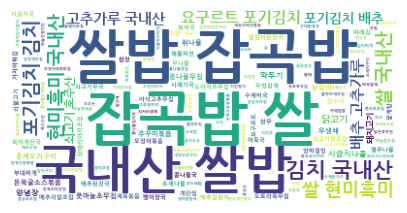

In [64]:
text = " ".join(df['중식메뉴'])
my_cloud_chart(text)

## keras Tokenizer() : 2D

In [65]:
print(df["중식메뉴"].str)

단어 카운트 : 
 OrderedDict([('쌀밥', 44), ('잡곡밥', 43), ('쌀', 50), ('현미흑미', 25), ('국내산', 115), ('오징어찌개', 1), ('쇠불고기', 2), ('쇠고기', 11), ('호주산', 11), ('계란찜', 2), ('청포묵무침', 1), ('요구르트', 20), ('포기김치', 44), ('배추', 17), ('고추가루', 17), ('김치찌개', 1), ('가자미튀김', 2), ('모둠소세지구이', 1), ('마늘쫑무침', 1), ('배추겉절이', 2), ('카레덮밥', 1), ('팽이장국', 2), ('치킨핑거', 1), ('닭고기', 7), ('쫄면야채무침', 1), ('견과류조림', 1), ('쇠고기무국', 2), ('주꾸미볶음', 3), ('부추전', 1), ('시금치나물', 4), ('떡국', 1), ('돈육씨앗강정', 1), ('돼지고기', 5), ('우엉잡채', 2), ('청경채무침', 1), ('시래기국', 2), ('훈제오리구이', 3), ('도토리묵무침', 2), ('쌈무', 2), ('양파절임', 2), ('김치', 33), ('꽃게탕', 2), ('돈육굴소스볶음', 3), ('옥수수전', 1), ('유채나물', 2), ('시금치국', 2), ('닭감자조림', 1), ('연두부', 1), ('양념장', 4), ('콩나물무침', 3), ('탕수어', 2), ('동태', 1), ('러시아산', 1), ('오징어숙회무침', 1), ('취나물', 3), ('냉이된장국', 1), ('쇠고기장조림', 2), ('통도라지구이', 1), ('치커리무침', 1), ('낙지비빔밥', 1), ('낙지', 1), ('중국산', 1), ('유부장국', 1), ('고구마치즈구이', 1), ('해초무침', 1), ('대구찌개', 1), ('마늘간장치킨', 1), ('새송이버섯볶음', 1), ('돌나물무침', 1), ('치킨무', 1), ('오곡밥', 1), ('쇠고기느타리국', 1), ('갈치구이', 1)

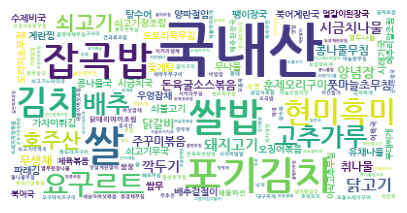

In [66]:
text_list = " ".join(df['중식메뉴']).split()
# print(text_list)

from keras.preprocessing.text import Tokenizer

token = Tokenizer()
token.fit_on_texts(text_list)

print("==="*20)      
print('단어 카운트 : \n', token.word_counts) 

print("==="*20)
print('각 단어가 몇 개의 문장에 포함되어 있는가 :  \n',token.word_docs) 

my_cloud_chart(token.word_docs)

## konlpy nouns() :  1D list()

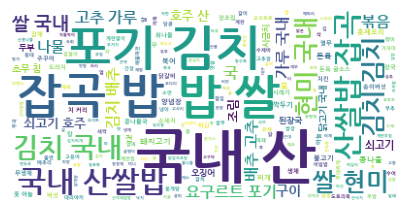

In [67]:
from konlpy.tag import Okt
sent_list = df['중식메뉴'].str.split(",")
# print(sent_list[0])

word_str = ""
for sent in sent_list:
    sent_str = " ".join(sent)
    # print('Mecab 명사 추출 :'  , Okt().nouns(sent_str)) 
    word_str += " ".join(Okt().nouns(sent_str))

my_cloud_chart(word_str)

## python Counter() : 2D

[('산', 126), ('국내', 115), ('김치', 79), ('쌀', 50), ('밥', 45), ('쌀밥', 44), ('포기', 44), ('잡곡', 43), ('현미', 25), ('미', 25), ('배추', 21), ('요구르트', 20), ('쇠고기', 19), ('고추', 19), ('볶음', 18), ('국', 18), ('가루', 17), ('나물', 14), ('구이', 12), ('호주', 11), ('조림', 11), ('돈육', 8), ('침', 8), ('닭고기', 7), ('초무', 7), ('오징어', 6), ('마늘', 6), ('시금치', 6), ('두부', 6), ('콩나물', 6), ('된장국', 6), ('모', 5), ('전', 5), ('돼지고기', 5), ('찌개', 4), ('불고기', 4), ('훈제오리', 4), ('양념장', 4), ('북어', 4), ('깍두기', 4)]


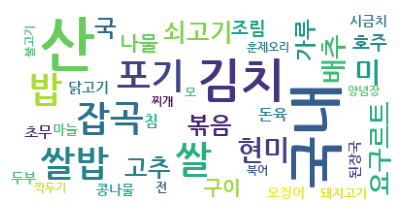

In [68]:
from collections import Counter
from konlpy.tag import Okt
okt = Okt()
tag_list = okt.pos(text) 

noun_adj_list = []
for word, tag in tag_list:
    if tag in ['Noun' , 'Adjective']:  #명사, 형용사
        noun_adj_list.append(word)


# 최빈도 40개
counts = Counter(noun_adj_list)  
tags = counts.most_common(40) 
print(tags)


my_cloud_chart(tags)

## 정규표현식

In [69]:
df['중식메뉴'][0]

'쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜  청포묵무침  요구르트  포기김치 (배추,고추가루:국내산) '

In [70]:
# def my_embedding(x):
#     x_ = []
#     split_list = x.split(' ')
#     for word in split_list:
#         try : 
#             if '(' in word and ':' in word and ')' in word:
#                 continue
#             if '/' in word:
#                 x_.extend(word.split('/'))
#             else:
#                 x_.append(word)
#         except :
#             continue
#     x_ = list(set(x_))
#     x_.remove('')
#     return x_

# print(df['중식메뉴'].head())

# df['중식메뉴2'] = df['중식메뉴'].apply(lambda x: my_embedding(x))
# df['중식메뉴2'].head()

In [71]:
import re 
text = ' 쌀밥 /잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 쇠고기:호주산) 계란찜  청포묵무침  요구르트  포기김치 (배추,고추가루:국내산) '
print(text,"\n")
# text = re.sub(r'/^\s+|\s+$/g', '', text.strip())    #앞뒤 공백 제거
text = text.strip()
text = text.replace(r' /','/')                      #슬러쉬 앞뒤 공백 제거
text = text.replace(r'/ ','/')                      

menu_list = []
for menu in  text.split():
    menu = re.sub(r'\([^)]*\)', '', menu.strip())     #(s) 제거
    menu = re.sub(r'[^)]*\)', ''  , menu.strip())     #s) 제거
    menu = re.sub(r'\([^)]*', ''  , menu.strip())     #(s 제거
    menu = re.sub(' +', ' '       , menu.strip())     #공백,탭 --> 공백
    if len(menu) > 0:
        menu_list.append(menu)
print(menu_list)

 쌀밥 /잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 쇠고기:호주산) 계란찜  청포묵무침  요구르트  포기김치 (배추,고추가루:국내산)  

['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치']


In [72]:
def my_reg(text):
    # text = re.sub(r'/^\s+|\s+$/g', '', text.strip())#앞뒤 공백 제거
    text = text.strip()
    text = text.replace(r' /','/')  #앞뒤 공백 제거
    text = text.replace(r'/ ','/')  #앞뒤 공백 제거
    
    menu_list = []
    for menu in text.split():
        menu = re.sub(r'\([^)]*\)', '', menu.strip())   #(s) 제거
        menu = re.sub(r'[^)]*\)', ''  , menu.strip())     #s) 제거
        menu = re.sub(r'\([^)]*', ''  , menu.strip())     #(s 제거
        menu = re.sub(' +', ' '       , menu.strip())          #공백,탭 제거
        if len(menu) > 0:
            menu_list.append(menu)
    # return menu_list
    return ' '.join(menu_list)


df['중식메뉴2'] = df['중식메뉴'].apply(lambda x: my_reg(x))
df[['중식메뉴','중식메뉴2']].head()

,중식메뉴,중식메뉴2
0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 청포묵무침 요구르트 포기김치 (배추,고추가루:국내산)",쌀밥/잡곡밥 오징어찌개 쇠불고기 계란찜 청포묵무침 요구르트 포기김치
1,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무침 요구르트 배추겉절이 (배추,고추가루:국내산)",쌀밥/잡곡밥 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무침 요구르트 배추겉절이
2,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 견과류조림 요구르트 포기김치 (배추,고추가루:국내산)",카레덮밥 팽이장국 치킨핑거 쫄면야채무침 견과류조림 요구르트 포기김치
3,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 요구르트 포기김치 (배추,고추가루:국내산)",쌀밥/잡곡밥 쇠고기무국 주꾸미볶음 부추전 시금치나물 요구르트 포기김치
4,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채 청경채무침 요구르트 포기김치 (배추,고추가루:국내산)",쌀밥/잡곡밥 떡국 돈육씨앗강정 우엉잡채 청경채무침 요구르트 포기김치


In [73]:
df['중식메뉴2'].str.split().tolist()[:1]

[['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치']]

In [74]:
maxLength = max(len(x) for x in df['중식메뉴2'].str.split().tolist() )
print(maxLength)
# df['중식메뉴2'].str.len().max()
menu_df = pd.DataFrame(df['중식메뉴2'].str.split().tolist(), columns= range(maxLength))
menu_df.fillna('', inplace=True)
menu_df.head()

7


,0,1,2,3,4,5,6
0,쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,요구르트,포기김치
1,쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,요구르트,배추겉절이
2,카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,요구르트,포기김치
3,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,요구르트,포기김치
4,쌀밥/잡곡밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,요구르트,포기김치


In [75]:
# menu_df.values

쌀밥/잡곡밥 오징어찌개 쇠불고기 계란찜 청포묵무침 요구르트 포기김치 쌀밥/잡곡밥 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무침 요구르트 배추겉절이 카레덮밥 팽이장국 치킨핑거 쫄면야채무침 견과류조림 요구르트 포기김치 쌀밥/잡곡밥 쇠고기무국 주꾸미볶음 부추전 시금치나물 요구르트 포기김치 쌀밥/잡곡밥 떡국 돈육씨앗강정 우엉잡채 청경채무침 요구르트 포기김치 쌀밥/잡곡밥 시래기국 훈제오리구이 도토리묵무침 쌈무/양파절임 요구르트 포기김치 쌀밥/잡곡밥 꽃게탕 돈육굴소스볶음 옥수수전 유채나물 요구르트 포기김치 쌀밥/잡곡밥 시금치국 닭감자조림 연두부*양념장 콩나물무침 요구르트 포기김치 쌀밥/잡곡밥 쇠고기무국 탕수어 오징어숙회무침 취나물 요구르트 포기김치 쌀밥/잡곡밥 냉이된장국 쇠고기장조림 통도라지구이 치커리무침 요구르트 포기김치 낙지비빔밥 유부장국 고구마치즈구이 해초무침 요구르트 요구르트 포기김치 쌀밥/잡곡밥 대구찌개 마늘간장치킨 새송이버섯볶음 돌나물무침/치킨무 요구르트 포기김치 쌀밥/오곡밥 쇠고기느타리국 갈치구이 호박꼬지&고사리&무나물 파래김*양념장 부럼/요구르트 포기김치 쌀밥/잡곡밥 콩나물국 돈육간장볶음 버섯잡채 꽃상추무침 요구르트 포기김치 비빔밥 팽이장국 소세지피망볶음 맛탕 귤 요구르트 포기김치 쌀밥/잡곡밥 북어계란국 닭갈비 새싹두부구이 곰피초장 요구르트 포기김치 쌀밥/잡곡밥 수제비국 오징어볶음 계란찜 도라지초무침 요구르트 포기김치 쌀밥/잡곡밥 얼갈이된장국 제육볶음 늙은호박전 치커리생채 요구르트 포기김치 쌀밥/잡곡밥 쇠고기미역국 주꾸미볶음 맛살계란말이 아삭고추무침 포기김치  쌀밥/잡곡밥 근대된장국 탕수육 새송이버섯조림 무생채 요구르트 포기김치 쌀밥/잡곡밥 부대찌개 가자미튀김 메추리알조림 열무된장나물 깍두기  쌀밥/잡곡밥 콩나물국 닭갈비 모둠묵*양념장 톳두부무침 포기김치  쌀밥/잡곡밥 차돌박이찌개 고등어김치말이 소세지구이 풋마늘초무침 깍두기  쌀밥/잡곡밥 북어국 돈육장조림 홍어무침 시금치나물 포기김치  쌀밥/잡곡밥 고추장찌개 닭데리야끼조림 해물파전 취나물 포기김치  쌀밥/잡

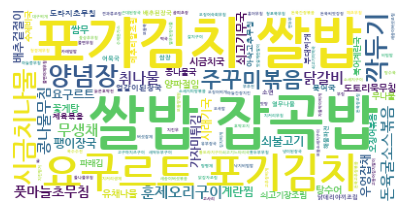

In [76]:
menu_list = menu_df.values.reshape(-1).tolist()
text = " ".join(menu_list)
print(text)
my_cloud_chart(text)